In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sb
import sklearn as skl
import time
from IPython.display import display, clear_output

import sklearn
from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.2.4
Sklearn  0.24.1


In [2]:
path = "./tabular-playground-feb21/"
!ls $path

'Complete solution.ipynb'   sample_submission.csv   test.csv   train.csv


### Load data

In [3]:
# 1 point 
 #load the train, test and sample_submission data using the is as the index column
df = None
df_t = None
sub = None

# YOUR CODE HERE

df = pd.read_csv(path+'train.csv', index_col=0)
df_t = pd.read_csv(path+'test.csv', index_col=0)
sub = pd.read_csv(path+'sample_submission.csv', index_col=0)

print("Train dataframe:", df.shape)
print("Test dataframe:", df_t.shape)
df.head()

Train dataframe: (300000, 25)
Test dataframe: (200000, 24)


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [4]:
print(sub.shape)
assert df.shape == (300000,25) 
assert df_t.shape == (200000,24) 
assert sub.shape == (200000,1) 

(200000, 1)


### Subsample the data

In [5]:
#1 point
# get a random sample of size 50k, tested with random state 0
dfs = None
# YOUR CODE HERE
dfs = df.sample(n=50000, random_state=0)

In [6]:
assert dfs.shape == (50000,25)

### There are no missings in this dataset

In [7]:
df.isna().sum().sum(), df_t.isna().sum().sum()

(0, 0)

In [8]:
df.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'target'],
      dtype='object')

### Define variables for x and y

In [9]:
cat_vars = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
num_vars = ['cont0', 'cont1', 'cont2', 'cont3',  'cont4',  'cont5',  'cont6',
            'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']

# 1 point 
# store in X all the categorical and numerical columns
# store in Y the target

x = 0
y = 0
# YOUR CODE HERE
x = dfs[cat_vars + num_vars]
y = dfs['target']

In [10]:
assert x.shape == (50000,24)
assert y.shape == (50000,)

### See the target variable ([The metric is RMSE](https://www.kaggle.com/c/tabular-playground-series-feb-2021/overview/evaluation))

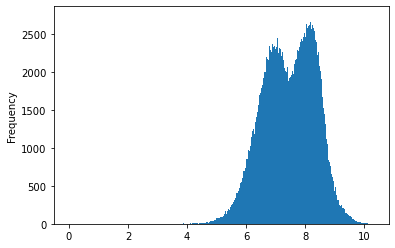

In [11]:
df.target.plot.hist(bins=500);

### See the numerical variables

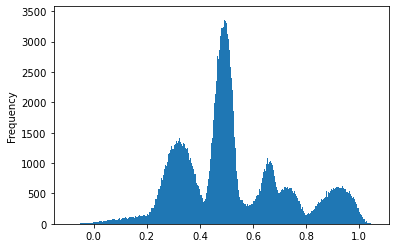

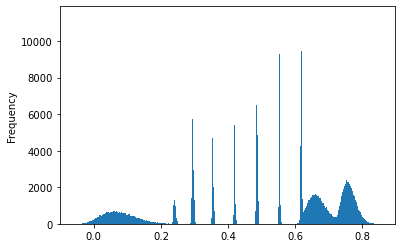

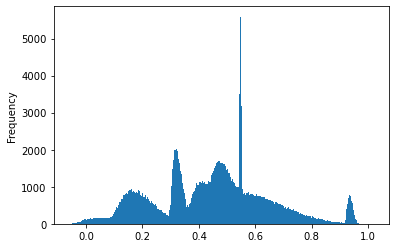

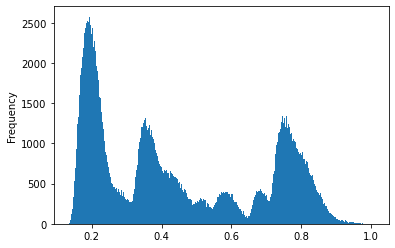

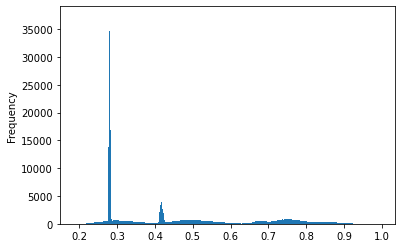

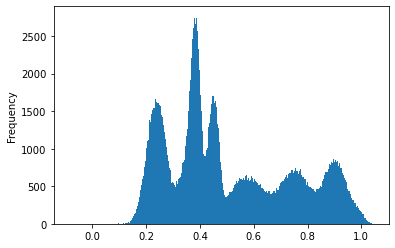

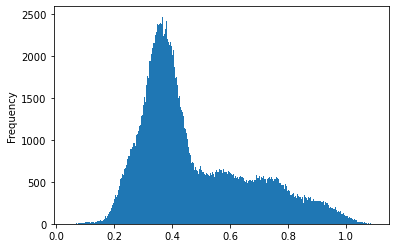

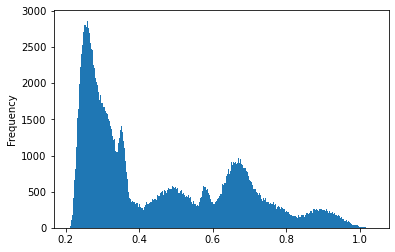

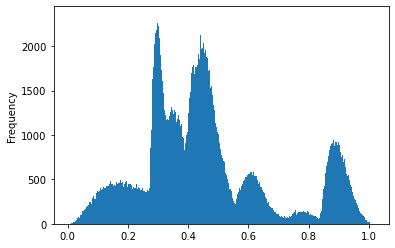

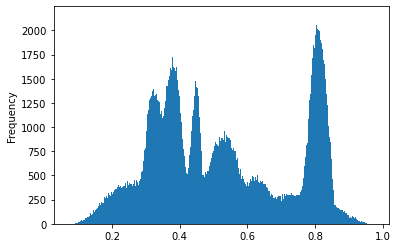

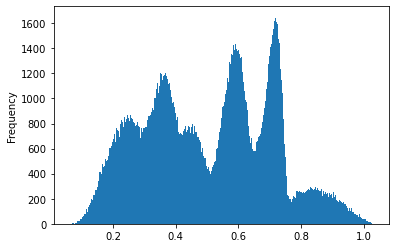

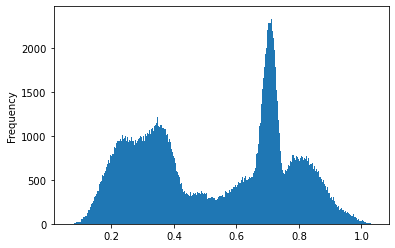

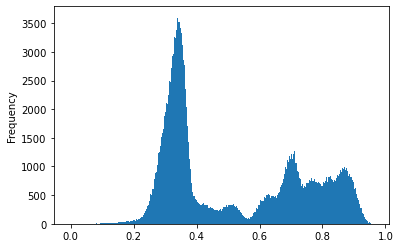

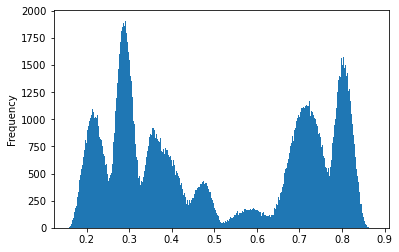

In [12]:
for var in num_vars:
    df[var].plot.hist(bins=500)
    plt.show();

### See the categorical variables (ypu can use `bar()`, `barh()` or `.pie()`)

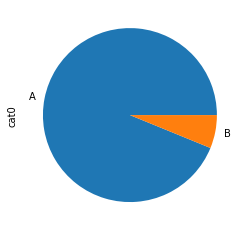

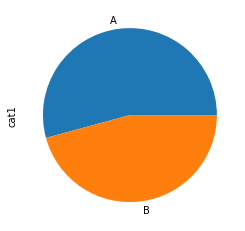

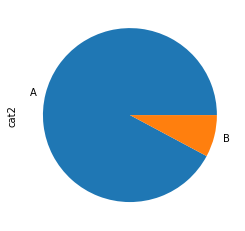

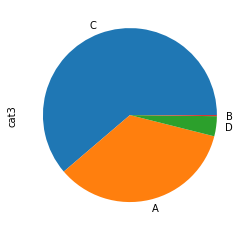

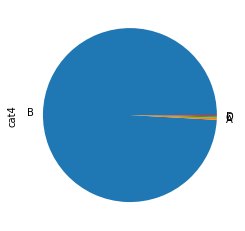

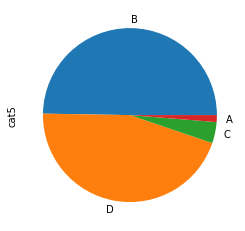

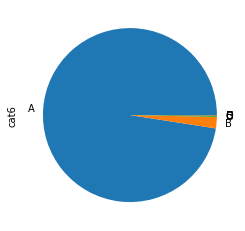

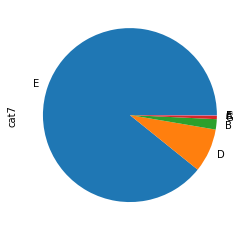

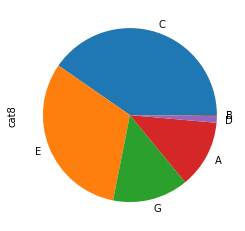

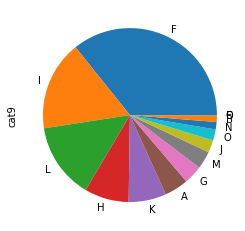

In [13]:
for var in cat_vars:
    #df[var].value_counts().plot.bar()
    #df[var].value_counts().plot.barh()
    df[var].value_counts().plot.pie()
    plt.show();

# Exercise 1 (2 pts)

Create the `ColumTransformer` for **models based on multiplications and distances**:
- Pipeline for numerical variables (`num_vars`): `Standardscaler()` or `QuantileTransformer(n_quantiles=100, output_distribution='normal')`
- Pipeline for categorical variables (`cat_vars`): `OneHotEncoder(handle_unknown='ignore')`

In [14]:
# YOUR CODE HERE

# Skipped imputer step, there are no missing values
# num_4_treeModels = pipeline.Pipeline(steps=[
  # Some SimpleImputer here
#   ('imputer', impute.SimpleImputer(strategy='mean', add_indicator=True)), # mean, median
# ])

cat_4_treeModels = pipeline.Pipeline(steps=[  
  # No need to impute here (no missing values)
#   ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing', add_indicator=True)),
  # Some Encoder here. Remember to handle_unknown
  ('ordinal', preprocessing.OrdinalEncoder(categories='auto', handle_unknown='use_encoded_value', unknown_value=-9999))
])

tree_prepro = compose.ColumnTransformer(transformers=[
    # ('num_t', num_4_treeModels, num_vars),
    ('cat_t', cat_4_treeModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

tree_prepro

ColumnTransformer(transformers=[('cat_t',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-9999))]),
                                 ['cat0', 'cat1', 'cat2', 'cat3', 'cat4',
                                  'cat5', 'cat6', 'cat7', 'cat8', 'cat9'])])

In [15]:
assert type(tree_prepro) is sklearn.compose._column_transformer.ColumnTransformer

# Exercise 2 (2 pts)

Create the `ColumTransformer` for **models based on trees**:
- Pipeline for numerical variables (`num_vars`): **Do nothing**. Tip: You can use `remainder='passthrough'` when you create the `ColumTransformer`.
- Pipeline for categorical variables (`cat_vars`): `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)[source]`

In [16]:
# YOUR CODE HERE
num_4_multModels = pipeline.Pipeline(steps=[
  # No need to impute here (no missing values)
  # ('imputer', impute.SimpleImputer(strategy='mean', add_indicator=False)), # mean, median
#   ('imputer', impute.KNNImputer(n_neighbors=10, add_indicator=True)), # mean, median
  ('quant', preprocessing.QuantileTransformer(output_distribution='normal', random_state=73)), 
  ('norm', preprocessing.Normalizer()),
])

cat_4_multModels = pipeline.Pipeline(steps=[
  # No need to impute here (no missing values)
#   ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing', add_indicator=True)),
  # Some Encoder here. Remember to handle_unknown
  ('onehot', preprocessing.OneHotEncoder(categories='auto', handle_unknown='ignore')),
])

mult_prepro = compose.ColumnTransformer(transformers=[
    ('num_m', num_4_multModels, num_vars),
    ('cat_m', cat_4_multModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

mult_prepro

ColumnTransformer(transformers=[('num_m',
                                 Pipeline(steps=[('quant',
                                                  QuantileTransformer(output_distribution='normal',
                                                                      random_state=73)),
                                                 ('norm', Normalizer())]),
                                 ['cont0', 'cont1', 'cont2', 'cont3', 'cont4',
                                  'cont5', 'cont6', 'cont7', 'cont8', 'cont9',
                                  'cont10', 'cont11', 'cont12', 'cont13']),
                                ('cat_m',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['cat0', 'cat1', 'cat2', 'cat3', 'cat4',
                                  'cat5', 'cat6', 'cat7', 'cat8', 'cat9'])])

In [17]:
assert type(mult_prepro) is sklearn.compose._column_transformer.ColumnTransformer

## Exercise 3 (2pts)
Reasearch about som models and its hyperparamters

In [18]:
# YOUR CODE HERE
# Tree models
from sklearn.tree           import DecisionTreeRegressor
from sklearn.ensemble       import RandomForestRegressor
from sklearn.ensemble       import ExtraTreesRegressor
from sklearn.ensemble       import AdaBoostRegressor
from sklearn.ensemble       import GradientBoostingRegressor
from sklearn.experimental   import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble       import HistGradientBoostingRegressor
from xgboost                import XGBRegressor
from lightgbm               import LGBMRegressor
from catboost               import CatBoostRegressor

# Multiplicative models
from sklearn.svm            import SVR
from sklearn.linear_model   import Lasso
from sklearn.linear_model   import SGDRegressor
from sklearn.linear_model   import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors      import KNeighborsRegressor

tree_regressors = {
  "Decision Tree": DecisionTreeRegressor(random_state=0),
  "Extra Trees": ExtraTreesRegressor(n_estimators=200),
  "Random Forest": RandomForestRegressor(n_estimators=200),
  "AdaBoost": AdaBoostRegressor(n_estimators=200),
  "Skl GBM": GradientBoostingRegressor(n_estimators=200),
  "Skl HistGBM": HistGradientBoostingRegressor(random_state=0),
  "XGBoost": XGBRegressor(random_state=0),
  "LightGBM": LGBMRegressor(random_state=0),
  "CatBoost":CatBoostRegressor(random_state=0),
  }

mult_regressors = {
  "SVR": SVR(),
  "Lasso": Lasso(),
  "SDG regr": SGDRegressor(),
  "Neural regr": MLPRegressor(random_state=73),
  "KNN regr": KNeighborsRegressor(n_neighbors=10),
  "Ridge": Ridge(alpha=0.6, random_state=73)
}


tree_regressors = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_regressors.items()}

mult_regressors = {name: pipeline.make_pipeline(mult_prepro, model) for name, model in mult_regressors.items()}

all_pipelines = {**tree_regressors, **mult_regressors}

In [28]:
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x, y, test_size=0.4, random_state=0)

results = pd.DataFrame({'Model': [], 'MSE': [], 'RMSE': [], 'Time': []})

for name, pipe in all_pipelines.items():

    start_time = time.time()
    preds = 0
    # YOUR CODE HERE
    pipe.fit(x_train, y_train)

    preds = pipe.predict(x_valid)

    mse = sum((y_valid - preds)**2) / preds.shape[0]

    rmse = np.sqrt(mse)

    total_time = time.time() - start_time
    

    
    results = results.append({"Model": name,
                              "MSE":   mse,
                              "RMSE":  rmse,
                              "Time":  total_time},
                              ignore_index=True)
    
    
    results_ord = results.sort_values(by=['RMSE'], ascending=True, ignore_index=True)
    results_ord.index += 1 
    clear_output()
    display(results_ord.style.bar(subset=['MSE', 'RMSE'], vmin=0, color='#5fba7d'))

,Model,MSE,RMSE,Time
1,Ridge,0.735964,0.857883,0.289798
2,SDG regr,0.741155,0.860904,0.372600
3,Skl HistGBM,0.751116,0.866669,1.608858
4,Skl GBM,0.751782,0.867054,1.840272
5,LightGBM,0.755363,0.869116,0.236291
6,SVR,0.763445,0.873753,103.118958
7,CatBoost,0.763814,0.873965,2.110802
8,XGBoost,0.772815,0.879099,0.731924
9,AdaBoost,0.776252,0.881051,0.572432
10,Lasso,0.778070,0.882083,0.300808


In [29]:
assert results_ord['MSE'].max() < 2
assert results_ord['MSE'].min() < 0.8
assert results_ord['RMSE'].max() < 1.5
assert results_ord['RMSE'].min() < 0.9

### Optional Exercise (optional because it takes a lot of time of computation)
Train with a more realable validation data the best models (maybe the best 5 models). You can:
- Use all training data (without subsample)
- Use Crosvalidation (`KFold`)(using 3, 5 or 7 folds) instead of `train_test_split`

In [19]:
df   = pd.read_csv(path+"train.csv", index_col="id")

print("Using all data with", len(df), "rows")
x = df[num_vars+cat_vars]
y = df["target"]

Using all data with 300000 rows


In [30]:
# IMPLEMENT SOMETHING SIMILAR TO THE PROCESS BEFORE
# BUT USE KFOLD

# YOUR CODE HERE
cat_4_treeModels = pipeline.Pipeline(steps=[  
  # No need to impute here (no missing values)
  ('ordinal', preprocessing.OrdinalEncoder(categories='auto', handle_unknown='use_encoded_value', unknown_value=-9999))
])

tree_prepro = compose.ColumnTransformer(transformers=[
    ('cat_t', cat_4_treeModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

tree_prepro

ColumnTransformer(transformers=[('cat_t',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-9999))]),
                                 ['cat0', 'cat1', 'cat2', 'cat3', 'cat4',
                                  'cat5', 'cat6', 'cat7', 'cat8', 'cat9'])])

In [31]:
num_4_multModels = pipeline.Pipeline(steps=[
  # No need to impute here (no missing values)
  ('quant', preprocessing.QuantileTransformer(output_distribution='normal', random_state=73)), 
  ('norm', preprocessing.Normalizer()),
])

cat_4_multModels = pipeline.Pipeline(steps=[
  # No need to impute here (no missing values)
  # Some Encoder here. Remember to handle_unknown
  ('onehot', preprocessing.OneHotEncoder(categories='auto', handle_unknown='ignore')),
])

mult_prepro = compose.ColumnTransformer(transformers=[
    ('num_m', num_4_multModels, num_vars),
    ('cat_m', cat_4_multModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

mult_prepro

ColumnTransformer(transformers=[('num_m',
                                 Pipeline(steps=[('quant',
                                                  QuantileTransformer(output_distribution='normal',
                                                                      random_state=73)),
                                                 ('norm', Normalizer())]),
                                 ['cont0', 'cont1', 'cont2', 'cont3', 'cont4',
                                  'cont5', 'cont6', 'cont7', 'cont8', 'cont9',
                                  'cont10', 'cont11', 'cont12', 'cont13']),
                                ('cat_m',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['cat0', 'cat1', 'cat2', 'cat3', 'cat4',
                                  'cat5', 'cat6', 'cat7', 'cat8', 'cat9'])])

In [32]:
# Select the 5 best models

tree_best = {
#   "Decision Tree": DecisionTreeRegressor(random_state=0),
#   "Extra Trees": ExtraTreesRegressor(n_estimators=200),
#   "Random Forest": RandomForestRegressor(n_estimators=200),
#   "AdaBoost": AdaBoostRegressor(n_estimators=200),
  "Skl GBM": GradientBoostingRegressor(n_estimators=200),
  "Skl HistGBM": HistGradientBoostingRegressor(random_state=0),
#   "XGBoost": XGBRegressor(random_state=0),
  "LightGBM": LGBMRegressor(random_state=0),
#   "CatBoost":CatBoostRegressor(random_state=0),
  }

mult_best = {
#   "SVR": SVR(),
#   "Lasso": Lasso(),
  "SDG regr": SGDRegressor(),
#   "Neural regr": MLPRegressor(random_state=73),
#   "KNN regr": KNeighborsRegressor(n_neighbors=10),
  "Ridge": Ridge(alpha=0.6, random_state=73)
}


tree_best = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_best.items()}

mult_best = {name: pipeline.make_pipeline(mult_prepro, model) for name, model in mult_best.items()}

best_pipelines = {**tree_best, **mult_best}

In [33]:
# Applying KFold
from sklearn.model_selection import cross_val_predict
# skf = model_selection.StratifiedKFold(
#     n_splits=15,
#     shuffle=True,
#     random_state=73
# )

results = pd.DataFrame({'Model': [], 'MSE': [], 'RMSE': [], 'Time': []})

for name, pipe in best_pipelines.items():

    start_time = time.time()
    preds = 0
    # YOUR CODE HERE

    preds = cross_val_predict(pipe, x, y, cv=15, n_jobs=-1)

    mse = sum((y - preds)**2) / preds.shape[0]

    rmse = np.sqrt(mse)

    total_time = time.time() - start_time
    

    
    results = results.append({"Model": name,
                              "MSE":   mse,
                              "RMSE":  rmse,
                              "Time":  total_time},
                              ignore_index=True)
    
    
    results_ord = results.sort_values(by=['RMSE'], ascending=True, ignore_index=True)
    results_ord.index += 1 
    clear_output()
    display(results_ord.style.bar(subset=['MSE', 'RMSE'], vmin=0, color='#5fba7d'))

,Model,MSE,RMSE,Time
1,Ridge,0.742362,0.861604,6.567491
2,SDG regr,0.743705,0.862383,7.720734
3,Skl GBM,0.754503,0.868621,244.950153
4,Skl HistGBM,0.754671,0.868718,9.337358
5,LightGBM,0.754720,0.868746,7.541781
